In [2]:
import tensorflow as tf

C:\Users\p\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd

import os

# to make this notebook's output stable across runs
# 
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype('int')

In [6]:
y_test

array([7, 2, 1, ..., 4, 5, 6])

28101 The number is :  8


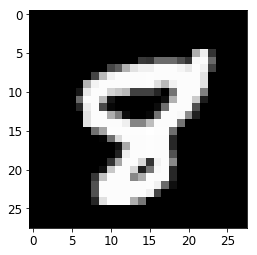

In [7]:
index = np.random.randint(len(X_train))
print (index, "The number is : ",y_train[index])
plt.imshow(X_train[index].reshape(28,28),cmap="gray")

In [8]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [9]:
reset_graph()
# placeholder = 사용자 외부로부터 입력을 받아서 저장하는 공간(None->batch-size 입력할 곳, 총데이터 shape)
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
#  shape -> None 쉐이프 자동으로
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [10]:
#  X : 전레이이어의 아웃풋, n_neurons : 다음 레이어의 갯수, name : 이름, activation : 액티베이션 함수
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1]) # 28*28 tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
       
    # 변경 Xavier Initialization -> 시그모이드에서 사용한다. , He Initialization -> Relu에서 사용한다.
#     렐루는 일정값 이상에서 값을 반영할수 있다. 시그모이드는 일정값 이상에서 무조건 1이다. 그러므로 렐루가 값을 더 반영하으로 좋다.
#    렐루는 사이즈가 큰 값에 사용하는 것이 좋다(ex 이미지)
    
        stddev = 2. / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs,n_neurons),stddev=stddev)# 
        
        W = tf.Variable(init, name="kernel")  # 
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")# 바이어스 행렬은 1 by hidden layer의 개수
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [11]:
#  렐루를 사용한다
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.elu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.elu)
    hidden3 = neuron_layer(hidden2, 100, name="hidden3",
                           activation=tf.nn.elu)
    logits = neuron_layer(hidden3, n_outputs, name="outputs")

In [12]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [19]:
learning_rate = 0.01

with tf.name_scope("train"):
#   optimizer = tf.train.GradientDescentOptimizer(learning_rate)
#     optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
#     optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=0.9)
#      optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=0.9,use_nesterov=True) Nestrov Accelerated Gradient

    training_op = optimizer.minimize(loss)

In [20]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1) # output 과 정답이 맞는지 정확도 뽑는 함수
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) # 정확도

In [21]:
init = tf.global_variables_initializer() # 이니셜라이즤
saver = tf.train.Saver()

In [22]:
n_epochs = 10
batch_size = 50

In [23]:
ACC_Train_List = []
ACC_Test_List = []

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                            y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
        ACC_Train_List.append(acc_train)
        ACC_Test_List.append(acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.96 Test accuracy: 0.9154
1 Train accuracy: 1.0 Test accuracy: 0.9553
2 Train accuracy: 0.98 Test accuracy: 0.9616
3 Train accuracy: 0.98 Test accuracy: 0.9587
4 Train accuracy: 0.96 Test accuracy: 0.9586
5 Train accuracy: 0.96 Test accuracy: 0.9647
6 Train accuracy: 0.96 Test accuracy: 0.9559
7 Train accuracy: 0.98 Test accuracy: 0.9663
8 Train accuracy: 1.0 Test accuracy: 0.9649
9 Train accuracy: 0.98 Test accuracy: 0.9546


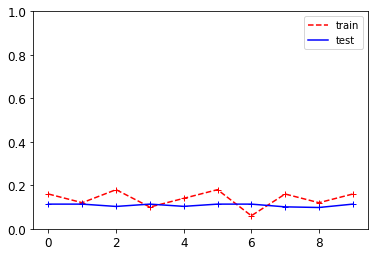

In [19]:
plt.plot(ACC_Train_List,'r--',label = "train")
plt.plot(ACC_Train_List,'r+')
plt.plot(ACC_Test_List, 'b-',label = "test")
plt.plot(ACC_Test_List, 'b+')
plt.ylim(0,1)
plt.legend()
plt.show()

In [20]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [21]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [22]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [23]:
show_graph(tf.get_default_graph())

## Using `dense()` instead of `neuron_layer()`

Note: the book uses `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [24]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [25]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [26]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.sigmoid)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.sigmoid)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [27]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [43]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [45]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [30]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [31]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.48 Test accuracy: 0.5457
1 Train accuracy: 0.64 Test accuracy: 0.6065
2 Train accuracy: 0.78 Test accuracy: 0.7158
3 Train accuracy: 0.88 Test accuracy: 0.7837
4 Train accuracy: 0.86 Test accuracy: 0.8225
5 Train accuracy: 0.82 Test accuracy: 0.8446
6 Train accuracy: 0.86 Test accuracy: 0.8589
7 Train accuracy: 0.94 Test accuracy: 0.8708
8 Train accuracy: 0.82 Test accuracy: 0.877
9 Train accuracy: 0.86 Test accuracy: 0.8841
10 Train accuracy: 0.88 Test accuracy: 0.8882
11 Train accuracy: 0.86 Test accuracy: 0.8908
12 Train accuracy: 0.92 Test accuracy: 0.8947
13 Train accuracy: 0.86 Test accuracy: 0.8974
14 Train accuracy: 0.92 Test accuracy: 0.9001
15 Train accuracy: 0.92 Test accuracy: 0.9016
16 Train accuracy: 0.94 Test accuracy: 0.904
17 Train accuracy: 0.86 Test accuracy: 0.9067
18 Train accuracy: 0.94 Test accuracy: 0.9058
19 Train accuracy: 0.88 Test accuracy: 0.9089


In [32]:
show_graph(tf.get_default_graph())